<a href="https://colab.research.google.com/github/Pallavih28/Gender_Image_Classification/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imsave, imread, imshow
from glob import glob

In [ ]:
!unzip /content/drive/MyDrive/Gender_Classification_Problem/Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5249.jpg         
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/test_fkwGUNG.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/train.csv')

In [ ]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
from keras.preprocessing import image

images = []
for img in train.image_names:
    img = image.load_img('images/' + img, target_size=(100, 100, 3))
    img = image.img_to_array(img)
    images.append(img)

images=np.array(images)

In [ ]:
X = images/255
y = train['class']

In [ ]:
X.shape, y.shape

((12196, 100, 100, 3), (12196,))

In [ ]:
seed = 4
rng = np.random.RandomState(seed)

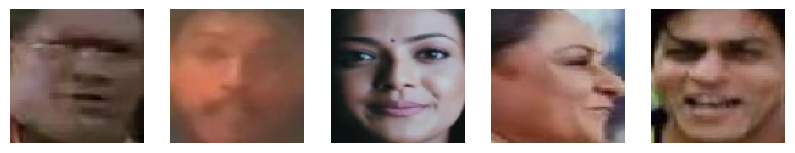

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(10,12))
for i in range(5):
  ax[i].imshow(X[i])
  ax[i].axis('off')

In [ ]:
X.min(),X.max()

(0.0, 1.0)

2. Data Pre-processing

In [ ]:
## Converting RGB format to 1D array
X = X.reshape(X.shape[0],100*100*3)

In [ ]:
X.shape

(12196, 30000)

3. Train and Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train,y_valid = train_test_split(X,y,random_state=seed,stratify=y,test_size=0.3)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape,y_valid.shape

((8537, 30000), (3659, 30000), (8537,), (3659,))

4. Model Architect

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import random_normal, glorot_normal, he_normal

In [ ]:
model = Sequential()

In [ ]:
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(units=800,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=500,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=250,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               24000800  
                                                                 
 batch_normalization (Batch  (None, 800)               3200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 500)               400500    
                                                                 
 batch_normalization_1 (Bat  (None, 500)               2000      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 batch_normalization_2 (Bat  (None, 250)               1

5. Compile the Model

In [ ]:
adam = Adam(lr=1e-5, clipvalue=1)

In [ ]:
### Complile the Model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=5,mode='min')

6. Fit the Model

In [ ]:
### Fit the Model
model_history = model.fit(X,y,epochs=80,batch_size=150,validation_data=(X_valid,y_valid),callbacks=early_stopping)

7. Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(y_valid.shape[0],)
# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on validation set:', np.round(accuracy_score(y_valid, prediction_int),3), '%')

115/115 [==============================] - 1s 3ms/step
Accuracy on validation set: 0.691 %


In [ ]:
train_prediction = model.predict(X_train)
train_prediction = train_prediction.reshape(y_train.shape[0],)
# converting probabilities to classes
train_prediction_int = train_prediction >= 0.5
train_prediction_int = train_prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on Training set:', np.round(accuracy_score(y_train, train_prediction_int),3), '%')

267/267 [==============================] - 1s 3ms/step
Accuracy on Training set: 0.7 %


Text(0, 0.5, 'accuracy')

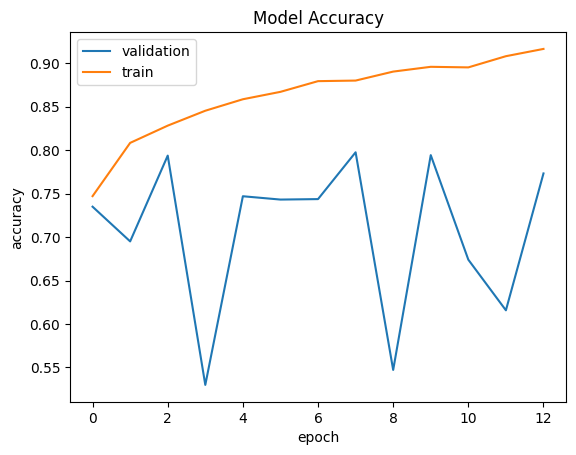

In [ ]:
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

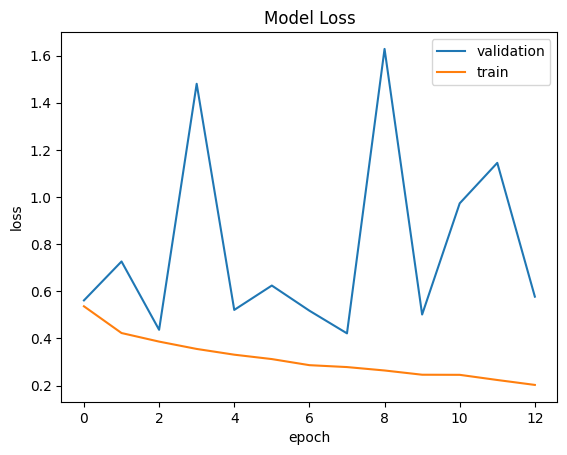

In [ ]:
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In the above case model is not overfitting yet so early stopping isn't right method of perfromance improvement. We can use methods to increase conversion speed of the model such as drop_out , BatchNormalization